In [64]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [65]:
df=pd.read_csv('data/weight-height.csv')

In [66]:
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


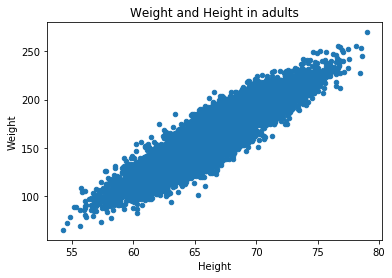

In [67]:
df.plot(kind="scatter",x="Height",y="Weight",title="Weight and Height in adults")

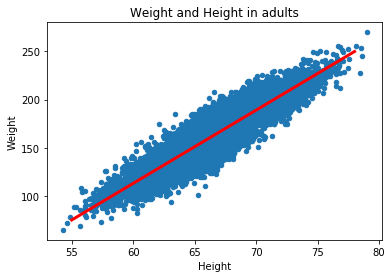

In [68]:
df.plot(kind="scatter",x="Height",y="Weight",title="Weight and Height in adults")
plt.plot([55,78],[75,250],color="red",linewidth=3)

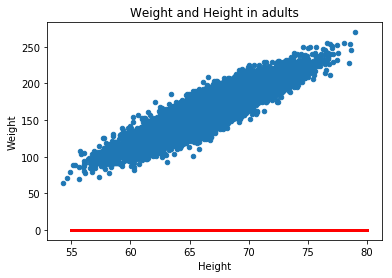

In [69]:
def line(x , w=0, b=0):
    return x * w+b

x = np.linspace(55, 80, 100)
yhat = line(x, w=0, b=0)

df.plot(kind="scatter",
        x="Height",
       y="Weight",
       title="Weight and Height in adults")
plt.plot(x,yhat,color="red",linewidth=3)

In [70]:
def mean_squared_error(y_true, y_pred):
    s=(y_true-y_pred)**2
    return s.mean()

In [71]:
x = df[['Height']].values
y_true= df[['Weight']].values

In [72]:
y_pred = line(x)
print (y_pred)

[[ 0.]
 [ 0.]
 [ 0.]
 ..., 
 [ 0.]
 [ 0.]
 [ 0.]]


In [73]:
error=mean_squared_error(y_true,y_pred.ravel())
print(error)

27093.8375746


In [74]:
sample=np.array([-100, -50, 0, 50, 100, 150])
mses=[]

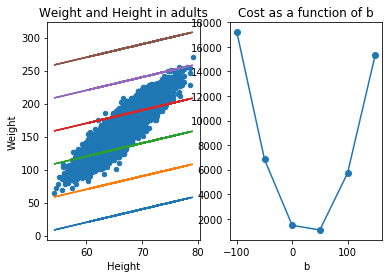

In [75]:
ax1 = plt.subplot(121)
df.plot(kind='scatter',
        x='Height',
        y='Weight',
        title='Weight and Height in adults', ax=ax1)

for s in sample:
    y_pred=line(x, w=2, b=s)
    mse = mean_squared_error(y_true, y_pred)
    mses.append(mse)
    plt.plot(x, y_pred)
    
ax2 = plt.subplot(122)
plt.plot(sample, mses, 'o-')
plt.title('Cost as a function of b')
plt.xlabel('b')
    

In [76]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam, SGD

In [77]:
model = Sequential()

In [78]:
model.add(Dense(1, input_shape=(1,)))

In [79]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [80]:
model.compile(Adam(lr=0.8), 'mean_squared_error')

In [81]:
model.fit(x, y_true, epochs=40)

Epoch 1/40
10000/10000 [==============================] - 0s - loss: 711.1071       
Epoch 2/40
10000/10000 [==============================] - 0s - loss: 543.3105     
Epoch 3/40
10000/10000 [==============================] - 0s - loss: 481.7703     

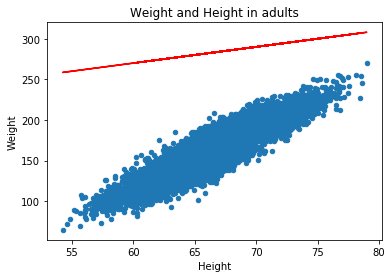

In [86]:
#plot the best fit line

df.plot(kind='scatter',
        x='Height',
        y='Weight',
        title='Weight and Height in adults')
plt.plot(x, y_pred, color='red')

In [84]:
W, B = model.get_weights()

In [85]:
#Printing final weight and bias

print(W , B)

[[ 7.68338442]] [-348.62936401]
